# Quick start: an implementation

In [1]:
import pygad
import openpyxl
import csv
import pandas as pd
import numpy as np

## Knapsack Problem with Genetic algorithms approach

To work better with the data we convert the file to csv

In [2]:
"""
# Launch only first time to generate a csv from an .xlsx file
ob = csv.writer(open("productsNEW.csv",'w', newline = ""))
data = openpyxl.load_workbook('products.xlsx').active
for r in data.rows:
    row = [a.value for a in r]
    ob.writerow(row)
"""

'\n# Launch only first time to generate a csv from an .xlsx file\nob = csv.writer(open("productsNEW.csv",\'w\', newline = ""))\ndata = openpyxl.load_workbook(\'products.xlsx\').active\nfor r in data.rows:\n    row = [a.value for a in r]\n    ob.writerow(row)\n'

Exploring dataset

In [3]:
data = pd.read_csv('productsNEW.csv')
data

,Product,Space,Price,Quantity
0,Refrigerator A,0.751000,999.90,3
1,Cell phone,0.000009,2199.12,2
2,TV 55,0.400000,4346.99,5
3,TV 50,0.290000,3999.90,5
4,TV 42,0.200000,2999.00,5
5,Notebook A,0.003500,2499.90,4
6,Ventilator,0.496000,199.90,12
7,Microwave A,0.042400,308.66,7
8,Microwave B,0.054400,429.90,7
9,Microwave C,0.031900,299.29,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   14 non-null     object 
 1   Space     14 non-null     float64
 2   Price     14 non-null     float64
 3   Quantity  14 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 576.0+ bytes


In [5]:
data.describe()

,Space,Price,Quantity
count,14.000000,14.000000,14.000000
mean,0.342801,1880.675000,5.500000
std,0.296205,1493.987231,2.710379
min,0.000009,199.900000,2.000000
25%,0.045400,534.675000,4.000000
50%,0.345000,1599.445000,5.000000
75%,0.519750,2874.225000,6.750000
max,0.870000,4346.990000,12.000000


**Our task**: Try to solve a basic *optimization problem* with what you have learned, here is the problem. 
A van in a shop must be filled to transport household appliances, its load must be optimized by **maximizing the value of what is transported for a given volume**. You have a file with occupied space, price and quantity of certain products. You are free to test for chosen free space (volume capacity) **values between 1 and 5**.

In [6]:
tot = np.sum(data.Quantity)
tot

77

Problem complexity: 2^77... as the video showed, a brute force algorithm could explore all combinations in a billion years.
So we will try the Genetic Algorithms approach using pyGAD libraries.

# Step 1: Choose a genetic representation 

*Binary or not binary?*

A binary representation involves the construction of arrays of length 77, it takes up *considerable space* even if we want to generate only a subset of the 2^77 possible combinations.
- 0 : the item isn't in the van.
- 1:  the item is in the van.

I have 14 different items (Refrigerator, cell phone etc). So I create an array of length 14.
- **0** : the item isn't in the van.
- **1**: one item is in the van.
- **n**: n items are in the van.


## Setting Gene Space

Each  gene can assume the value between *0 and max quantity.*

In [7]:
gene_spaceCustom = [[]]
gene_spaceCustom

[[]]

In [8]:
gene_spaceCustom.pop()
gene_spaceCustom

for x in data.Quantity:
    val = x+1; # because range(0,4) means interval [0,4)
    gene_spaceCustom.append(range(val))
    
#gene_spaceCustom

## Step 2: Define fitness function

The function return
- n : that is the sum of product between price and quantity of the item
- -1 : if the space of item exceed the limit

In [9]:
#maximum capacity value
MAXCAP = 1

def fitness_function(ga_instance, solution, solution_idx):
        sol =0
        cap=0
        for i in range(0,14):
            sol += solution[i]*data.Price[i]
            cap += solution[i]*data.Space[i]
            if cap > MAXCAP:
                return -1
        return sol

In [10]:
ga_instance = pygad.GA(num_generations=10,
                       num_parents_mating=2,
                       sol_per_pop= 50,
                       num_genes=14,
                    
                       fitness_func=fitness_function,


                       gene_space= gene_spaceCustom,
                       gene_type = int)

ga_instance.run()

#print(ga_instance.initial_population)
#print(ga_instance.population)

In [11]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# best solution [ 2  0  4  2  3  3 12  5  7  8  1  0  1  1]
#best fitness -1

Parameters of the best solution : [ 2  0  4  2  3  3 12  5  7  8  1  0  1  1]
Fitness value of the best solution = -1
Index of the best solution : 0


No handles with labels found to put in legend.


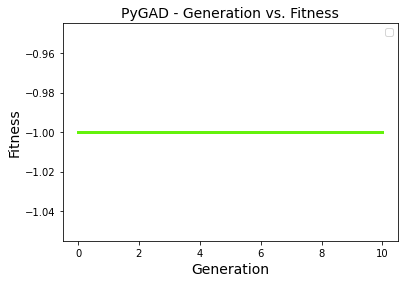

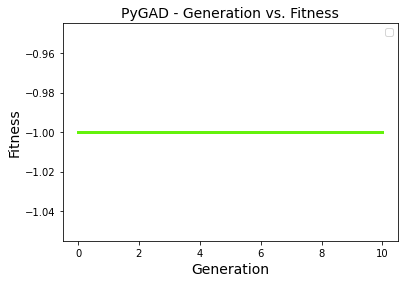

In [12]:
ga_instance.plot_fitness()

## Observation
We generate a population of 50 chromosome and generate 10 generation.
All the combinations analyzed are **not valid** because out of bound.
The subset of valid combinations is too small and our "ecosystem" of combination need to be helped to know the potential of each gene. If we start from a random ecosystem we risk creating a toxic environment that is too full of noise and unacceptable combinations. 
In a mathematical way we have to create a matrix where each row and column is **linearly independent**: the essence of our space.

# Step 3: a User defined initial population

In [13]:
ipop = [[ 1,  0,  0,  0,  0,  0, 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 0,  0,  0,  0,  0,  0,  0,  1]]

In [14]:
ga_instance = pygad.GA(num_generations=10,
                       num_parents_mating=2,
                       sol_per_pop= 14,
                       num_genes=14,
                       initial_population= ipop,
                    
                       fitness_func=fitness_function,

                       gene_space= gene_spaceCustom,
                       gene_type = int)

ga_instance.run()

#print(ga_instance.initial_population)
print(ga_instance.population)

[[0 2 0 0 3 4 0 3 3 0 0 0 0 0]
 [0 2 0 0 3 1 0 3 3 0 0 0 0 0]
 [0 0 0 0 3 0 0 3 3 0 0 0 0 0]
 [0 2 0 0 3 4 0 3 3 0 1 0 0 0]
 [0 0 0 0 3 4 0 3 3 0 0 2 0 0]
 [0 2 0 0 3 4 0 3 3 0 0 2 0 0]
 [0 0 0 0 3 4 0 3 3 0 0 0 0 3]
 [0 2 0 0 3 4 0 6 3 0 0 0 0 0]
 [0 0 0 0 3 4 0 3 3 0 0 0 1 0]
 [0 0 0 5 3 4 0 3 3 0 0 0 0 0]
 [0 0 0 0 3 4 0 3 4 0 0 0 0 0]
 [0 2 0 0 3 4 0 3 3 0 2 0 0 0]
 [0 0 0 0 3 4 0 3 3 0 0 0 0 2]
 [0 2 0 0 3 4 0 3 3 0 0 0 0 0]]


In [15]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [0 2 0 0 3 4 0 3 3 0 0 0 0 0]
Fitness value of the best solution = 25610.52
Index of the best solution : 0


No handles with labels found to put in legend.


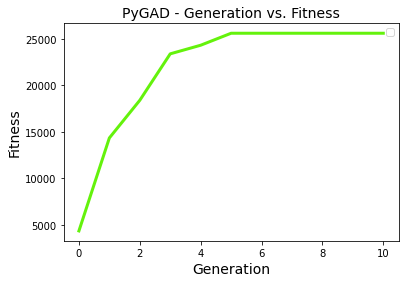

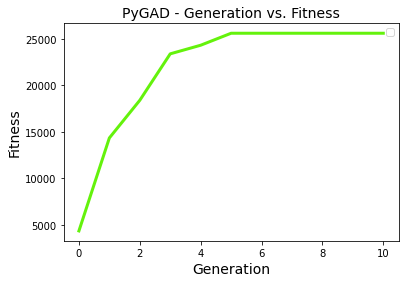

In [16]:
ga_instance.plot_fitness()

## Perfecting evolution
1. Avoid random mutation and using the simplest crossover: mutation can increase noise and the simplest crossover can slowly teach the system to evolve. 

In [17]:
#maximum capacity value
MAXCAP = 1

def fitness_function(ga_instance, solution, solution_idx):
        sol =0
        cap=0
        for i in range(0,14):
            sol += solution[i]*data.Price[i]
            cap += solution[i]*data.Space[i]
            if cap > MAXCAP:
                return -1
        return sol
    
ga_instance = pygad.GA(num_generations=2,
                       num_parents_mating=2,
                       sol_per_pop= 14,
                       num_genes=14,
                       initial_population= ipop,
                    
                       fitness_func=fitness_function,

                       gene_space= gene_spaceCustom,
                      
                      crossover_type = "single_point",
                      mutation_probability = None,
                       
                      gene_type = int)
                      

ga_instance.run()

#print(ga_instance.initial_population)
print(ga_instance.population)

[[0 2 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 7 0 2 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 4]
 [0 0 0 1 0 0 0 7 7 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 6]
 [0 2 1 0 0 0 0 0 7 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [0 2 1 0 0 0 0 4 7 0 0 0 0 0]
 [0 0 1 0 3 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0]]


In [18]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))
#best solution [0 0 1 0 3 0 0 0 0 0 0 0 0 0]
#best fitness 13343.99

Parameters of the best solution : [0 0 1 0 3 0 0 0 0 0 0 0 0 0]
Fitness value of the best solution = 13343.99
Index of the best solution : 10


No handles with labels found to put in legend.


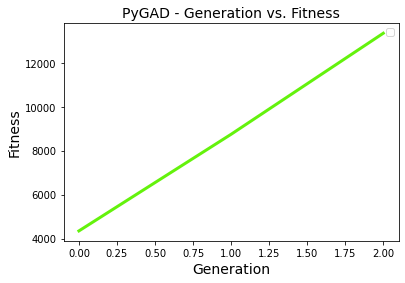

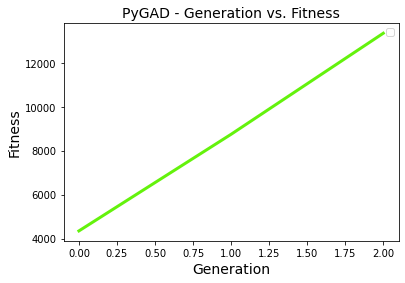

In [19]:
ga_instance.plot_fitness()

## Increasing generations

In [20]:
#maximum capacity value
MAXCAP = 1

def fitness_function(ga_instance, solution, solution_idx):
        sol =0
        cap=0
        for i in range(0,14):
            sol += solution[i]*data.Price[i]
            cap += solution[i]*data.Space[i]
            if cap > MAXCAP:
                return -1
        return sol
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=2,
                       sol_per_pop= 14,
                       num_genes=14,
                       initial_population= ipop,
                    
                       fitness_func=fitness_function,

                       gene_space= gene_spaceCustom,
                      
                      crossover_type = "single_point",
                      mutation_probability = None,
                       
                      gene_type = int)
                      

ga_instance.run()

#print(ga_instance.initial_population)
print(ga_instance.population)

[[0 2 1 1 0 4 0 0 3 4 0 0 0 0]
 [0 2 1 1 0 4 0 0 7 4 0 0 0 0]
 [0 2 1 1 0 4 0 0 0 4 0 0 0 1]
 [0 2 1 1 0 1 0 0 0 0 0 0 0 0]
 [0 2 1 1 0 4 0 0 0 0 0 0 0 6]
 [0 2 1 1 0 4 0 0 0 0 0 1 0 0]
 [0 2 1 1 3 4 0 0 0 0 0 0 0 0]
 [0 2 1 1 0 4 0 0 3 4 0 0 3 0]
 [0 2 1 1 0 4 9 0 3 4 0 0 0 0]
 [0 2 3 1 0 4 0 0 0 0 0 0 0 0]
 [0 2 1 1 0 1 0 0 3 4 0 0 0 0]
 [0 2 1 1 1 4 0 0 3 0 0 0 0 0]
 [0 2 1 1 0 4 0 7 3 4 0 0 0 0]
 [0 2 1 1 0 4 5 0 0 0 0 0 0 0]]


In [21]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

#best solution [0 2 1 1 0 4 0 0 3 4 0 0 0 0]
#best fitness 25231.59

Parameters of the best solution : [0 2 1 1 0 4 0 0 3 4 0 0 0 0]
Fitness value of the best solution = 25231.59
Index of the best solution : 0


No handles with labels found to put in legend.


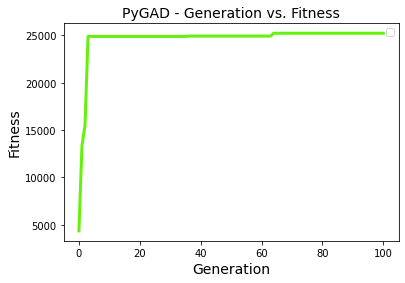

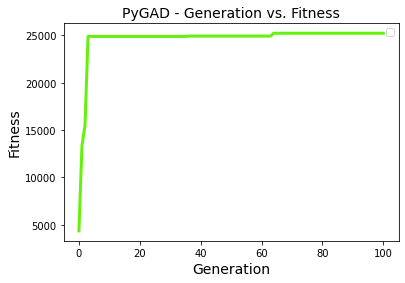

In [22]:
ga_instance.plot_fitness()

In [238]:
# Saving the GA instance.
filename = 'geneticTestCanale' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Conclusion

*Is our combination the optimal one?*
We don't know, the only thing we know is that the optimal solution found is the best among those found. 
Adding generations did not change the result, but we cannot know whether chance could have generated a better combination.

So we put in the initial population the best solution and introduce a **random mutation** and **two points** crossover because, as Niezschete said, *One must have chaos in oneself to give birth to a dancing star*. 

In [241]:
ipop.append(solution)
ipop

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 array([0, 2, 0, 3, 0, 4, 0, 1, 0, 2, 0, 0, 0, 0])]

In [263]:
#maximum capacity value
MAXCAP = 1

def fitness_function(ga_instance, solution, solution_idx):
        sol =0
        cap=0
        for i in range(0,14):
            sol += solution[i]*data.Price[i]
            cap += solution[i]*data.Space[i]
            if cap > MAXCAP:
                return -1
        return sol
ga_instance = pygad.GA(num_generations=10000,
                       num_parents_mating=2,
                       sol_per_pop= 14,
                       num_genes=14,
                       initial_population= ipop,
                    
                       fitness_func=fitness_function,

                       gene_space= gene_spaceCustom,
                      
                      crossover_type = "two_points",
                      mutation_type = 'random',
                       
                      gene_type = int)
                      

ga_instance.run()

#print(ga_instance.initial_population)
#print(ga_instance.population)

In [264]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))
#best solution [0 2 0 0 4 4 0 0 1 4 0 0 0 0]
#best fitness 28020.899999999998

Parameters of the best solution : [0 2 0 0 4 4 0 0 1 4 0 0 0 0]
Fitness value of the best solution = 28020.899999999998
Index of the best solution : 0


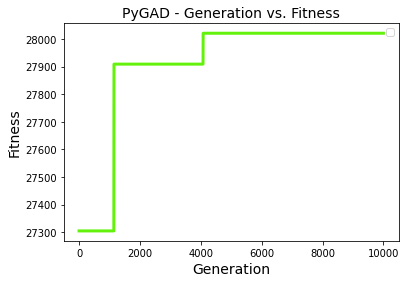

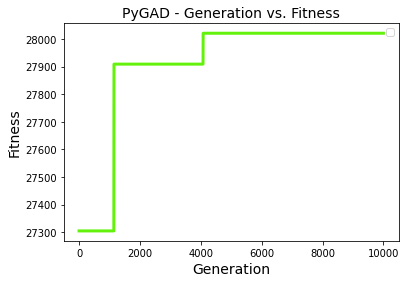

In [265]:
ga_instance.plot_fitness()

## We have find a better solution!

We don't use parallel programming because  it is not convenient in terms of time if the fitness function is simple.


In [268]:
# Saving the GA instance.
filename = 'geneticTestCanale_improved' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)